# Unit 6: The Data Journalist

## Learning Outcomes

* Recognising the role of data presentation in communicating information.
* Explaining how context and limitations affect interpretation of data.
* Applying data summaries and visualisations to generate simple data-driven narratives.
* Analysing data outputs critically to avoid overstatement and misinterpretation.

## Introduction

Numbers by themselves do not tell a story. A story emerges when data is selected carefully, analysed thoughtfully, and explained clearly. This is the role of a data journalist.

A data journalist does not only calculate. They decide what data to use, what to show, what to compare, and how to explain results in a way that others can understand. In this unit, you will act as a data journalist by using temperature data to create a simple, evidence-based narrative.

## Activity 6.1: Revisiting the Dataset with a Purpose

In the previous unit, you collected long-term temperature data and studied trends. Now, instead of asking only mathematical questions, you will ask storytelling questions.

Let us begin by loading the dataset you created earlier. The code below downloads and prepares the dataset, you used a similar code in Unit 5.

In [1]:
import requests
import pandas as pd

# Coordinates for the city (example: Delhi)
latitude = 28.6139
longitude = 77.2090

years = list(range(1975, 2025))
average_temps = []

for year in years:
    start_date = f"{year}-05-01"
    end_date = f"{year}-06-30"

    url = (
        "https://archive-api.open-meteo.com/v1/archive"
        f"?latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={end_date}"
        "&daily=temperature_2m_max"
        "&timezone=Asia%2FKolkata"
    )

    response = requests.get(url, timeout=30).json()

    if "daily" in response:
        temps = response["daily"]["temperature_2m_max"]
        average_temps.append(sum(temps) / len(temps))
    else:
        average_temps.append(None)

df_trend = pd.DataFrame({
    "Year": years,
    "AverageMaxTemperature": average_temps
})

df_trend.head()


,Year,AverageMaxTemperature
0,1975,39.521311
1,1976,37.922951
2,1977,38.209836
3,1978,40.616393
4,1979,39.308197


This dataset contains:

* Year
* Average maximum temperature for selected months

As a data journalist, your first task is to decide what question you want to answer.

**Examples**:

* Has the average summer temperature changed over time
* Are recent years different from earlier decades
* How large are year-to-year variations

> **Learning Note**
>
> This dataset is created by downloading publicly available weather data
> and summarising it into yearly averages.
> Creating the dataset within the unit ensures that the analysis
> does not depend on work done in earlier units.



## Activity 6.2: Choosing What to Show

A good data story does not show everything. It shows what matters.

Let us begin with a simple visual that compares early years with recent years.

In [2]:
first_period = df_trend[df_trend["Year"] <= 1990]
recent_period = df_trend[df_trend["Year"] >= 2010]

first_period["AverageMaxTemperature"].mean(), recent_period["AverageMaxTemperature"].mean()

(39.36055327868852, 38.937704918032786)

This comparison helps you decide whether there is a noticeable difference between earlier and recent periods.

## Activity 6.3: Creating a Clear Visual for Communication

Now create a graph that can be understood by someone who has not seen the raw data.

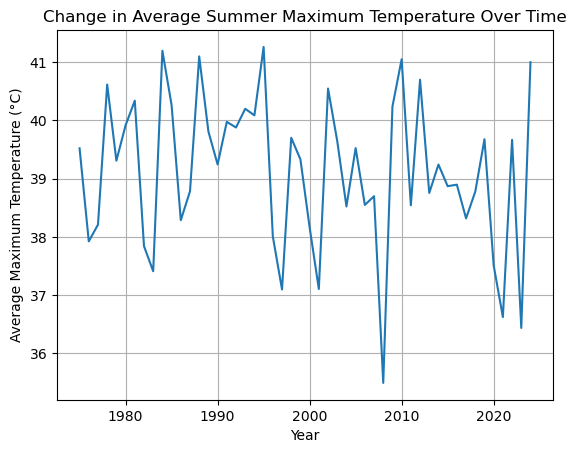

In [3]:
import matplotlib.pyplot as plt

plt.plot(df_trend["Year"], df_trend["AverageMaxTemperature"], label="Yearly Average")
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (°C)")
plt.title("Change in Average Summer Maximum Temperature Over Time")
plt.grid(True)
plt.show()

As a data journalist, you should ask:

* Is the graph easy to read
* Are the axes clearly labelled
* Does the title explain what the graph shows

## Activity 6.4: Adding Context to the Story

Data does not exist in isolation. Context helps readers understand what they see.

Think about factors that could affect temperature values:

* natural climate variability
* urban growth
* changes in land use
* weather patterns

You do not need to prove causes. You only need to acknowledge uncertainty.

> **Learning Note**
> A data journalist explains what the data shows and also explains its limits.
Honest reporting includes uncertainty and does not overstate conclusions.

## Activity 6.5: Generating a Data Story Automatically

Instead of writing a story ourselves, we will let the computer summarise the data in simple sentences. This is similar to how news websites automatically generate short reports from data.

The code below calculates key values and prints a short data-based narrative.

In [4]:
start_year = df_trend["Year"].min()
end_year = df_trend["Year"].max()

early_avg = df_trend[df_trend["Year"] <= start_year + 10]["AverageMaxTemperature"].mean()
late_avg = df_trend[df_trend["Year"] >= end_year - 10]["AverageMaxTemperature"].mean()

difference = late_avg - early_avg

if difference > 0:
    trend_statement = "an increase"
elif difference < 0:
    trend_statement = "a decrease"
else:
    trend_statement = "very little change"

print(f"From {start_year} to {end_year}, the data shows {trend_statement} in average summer maximum temperature.")
print(f"The average value in the early years was about {early_avg:.2f} °C.")
print(f"The average value in the recent years was about {late_avg:.2f} °C.")
print("There is noticeable variation from year to year, which is common in real-world data.")


From 1975 to 2024, the data shows a decrease in average summer maximum temperature.
The average value in the early years was about 39.32 °C.
The average value in the recent years was about 38.64 °C.
There is noticeable variation from year to year, which is common in real-world data.


## Practice Tasks

Try the following tasks to strengthen your data storytelling skills.

1. Change the time periods used for comparison and observe how the story changes.


In [5]:
early = df_trend[df_trend["Year"] <= 1985]["AverageMaxTemperature"].mean()
late = df_trend[df_trend["Year"] >= 2005]["AverageMaxTemperature"].mean()

early, late


(39.322205663189266, 38.828442622950824)

2. Create a graph that shows only the last 20 years.

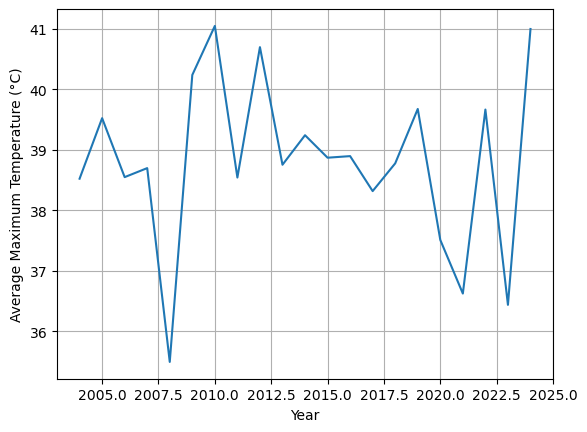

In [6]:
recent_20 = df_trend[df_trend["Year"] >= df_trend["Year"].max() - 20]

plt.plot(recent_20["Year"], recent_20["AverageMaxTemperature"])
plt.xlabel("Year")
plt.ylabel("Average Maximum Temperature (°C)")
plt.grid(True)
plt.show()

3. Add a trend line and explain what it summarises.

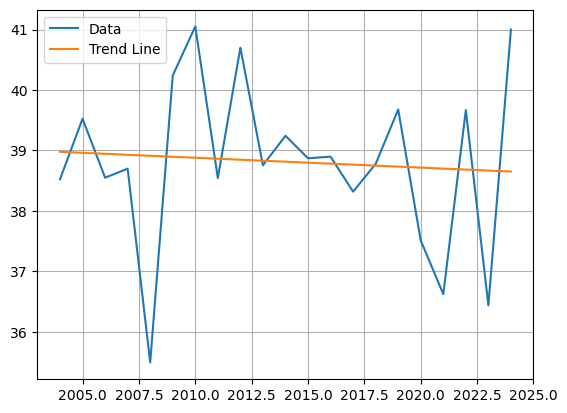

In [7]:
import numpy as np

x = recent_20["Year"]
y = recent_20["AverageMaxTemperature"]

m, c = np.polyfit(x, y, 1)
plt.plot(x, y, label="Data")
plt.plot(x, m * x + c, label="Trend Line")
plt.legend()
plt.grid(True)
plt.show()


4. Identify one limitation of the dataset used.

> *Hint*: Example:
> * Data covers only selected months
> * A single city is analysed
> * Year-to-year variability is high


5. Suggest one additional dataset that could strengthen the story.

> *Hint*: Examples:
> * rainfall data
> * minimum night-time temperature
> * data from another city

## Reflection (Optional)

In this final unit, you moved beyond calculation to communication. You learned that data analysis is not complete until results are explained clearly and honestly.

Reflect on the following:

* How did your role change from analyst to journalist
* Why is context important when presenting data
* What responsibility does a data journalist have
* How can data be misinterpreted if presented carelessly


## Where Does Real-World Data Come From

Data journalists and analysts rarely collect all data themselves. Most real-world data comes from public organisations that make their data openly available.

Some reliable sources of data related to weather, climate, and geography are listed below.

### Weather and Temperature Data

* Open-Meteo: Provides free historical and current weather data such as temperature, rainfall, and wind for cities across the world. Website: https://open-meteo.com

* India Meteorological Department (IMD): Publishes official weather and climate information for India. Some datasets are available through government portals.

### Rainfall and Climate Data

* data.gov.in (India’s Open Data Portal): Hosts datasets from Indian government departments, including rainfall, climate, agriculture, and environment data. Website: https://data.gov.in

* NOAA Climate Data (International): Provides long-term global climate datasets used by scientists worldwide. Website: https://www.ncei.noaa.gov

### Data from Different Cities or Regions

* Open-Meteo can be used for almost any city by changing latitude and longitude values.
* data.gov.in provides district-wise and state-wise data for India.

> **Learning Note**
> Knowing where data comes from is part of data literacy.
A data journalist should always be able to say whether data is official,
publicly available, and reliable.